Notebook for image classification using fastai 

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
!pip install wget #For colab

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# drive.flush_and_unmount()

Mounted at /content/drive


In [44]:
import wget, argparse, zipfile, tarfile, sys
from pathlib import Path

In [45]:
from fastai.vision import *

In [46]:
def simple_progress_bar(current, total, width=80):
    progress_message = "Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total)
    sys.stdout.write("\r" + progress_message); sys.stdout.flush()


In [47]:
  zip_ref = zipfile.ZipFile('/content/drive/My Drive/StanfordNeuralNetwork.zip', 'r')
  zip_ref.extractall(path='data/')
  zip_ref.close()

In [48]:
path=Path('data/StanfordNeuralNetwork')

In [49]:
labels=pd.read_csv(path/'car_labels.csv')

In [50]:
data=ImageDataBunch.from_df(path=path/'car_ims', df=labels, valid_pct=0.2, fn_col='filename', label_col='label', 
                            ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

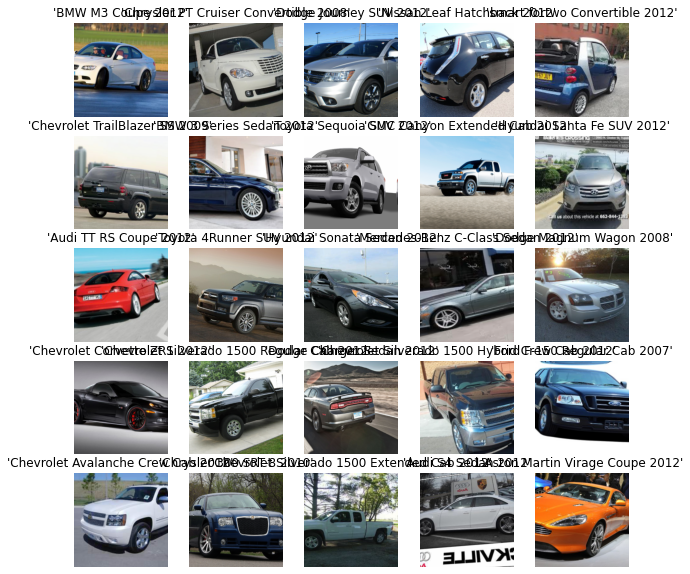

In [51]:
data.show_batch(figsize=(10,10))

In [52]:
learn=cnn_learner(data, models.resnet101, metrics=accuracy)

In [53]:
learn.freeze()

In [54]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


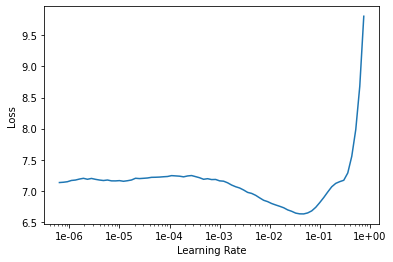

In [55]:
learn.recorder.plot()

In [56]:
lr=1e-03
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,5.576800,3.894837,0.163114,06:40
1,3.466772,2.252693,0.456287,06:37
2,2.291000,1.474652,0.627742,06:36
3,1.622066,1.128837,0.693852,06:36
4,1.216999,0.933900,0.751004,06:36
5,0.976014,0.825024,0.775409,06:35
6,0.848368,0.781384,0.788693,06:47
7,0.759476,0.771230,0.790238,06:46


In [57]:
learn.unfreeze()

In [58]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


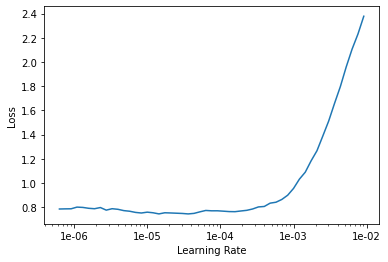

In [59]:
learn.recorder.plot()

In [60]:
interp=ClassificationInterpretation.from_learner(learn)

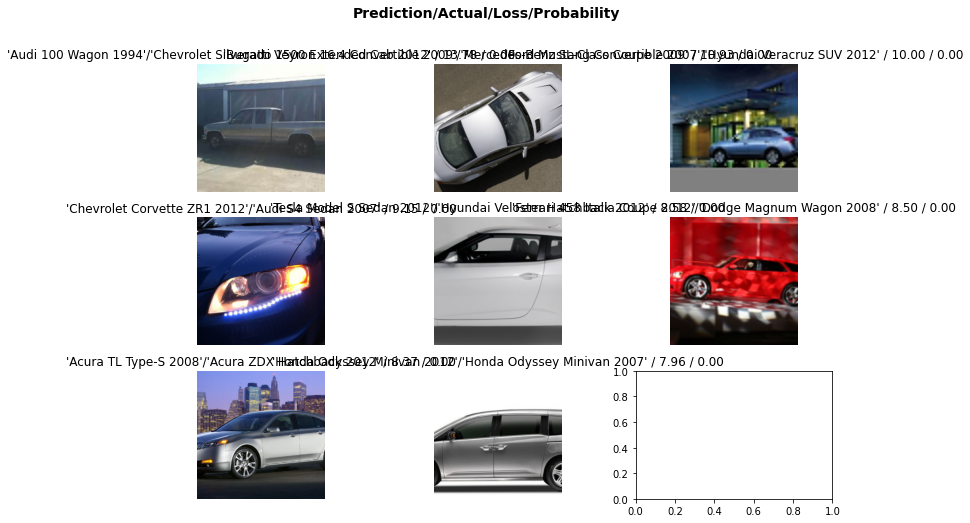

In [66]:
interp.plot_top_losses(k=8, figsize=(12, 8))

In [62]:
learn.export('models/car-classifier.pkl') #Save Weights Locally